In [2]:
import pandas as pd
from PIL import Image
import os
from tqdm import tqdm

from straug.noise import GaussianNoise
# from straug.blur import GaussianBlur
# GaussianBlur는 에러 문제로 직접 Class 정의.

from straug.camera import Contrast, Brightness, Pixelate

In [3]:
os.getcwd()

'/home/cuai5th/CUAI_2022/KWAKsumin/어그멘테이션'

In [4]:
# 파일 불러오기
df = pd.read_csv("/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug/gt.txt", sep='\t', header=None)
df.columns = ['img_path', 'label']
df

,img_path,label
0,images/image_031251.png,넣
1,images/image_248644.png,그
2,images/image_228006.png,전세
3,images/image_215487.png,위쪽
4,images/image_222170.png,장국수
...,...,...
162939,images/image_200650.png,쑤
162940,images/image_207997.png,늣
162941,images/image_270139.png,섄분
162942,images/image_239246.png,멱


In [5]:
df_no = df.sample(n=16000)
df_no_index = df_no.index.to_list()
df = df.drop(df_no_index)

df_br = df.sample(n=16000)
df_br_index = df_br.index.to_list()
df = df.drop(df_br_index)

df_bl = df.sample(n=16000)
df_bl_index = df_bl.index.to_list()
df = df.drop(df_bl_index)

df_co = df.sample(n=16000)
df_co_index = df_co.index.to_list()
df = df.drop(df_co_index)

df_pi = df.sample(n=16000)
df_pi_index = df_pi.index.to_list()
df = df.drop(df_pi_index)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82944 entries, 0 to 162940
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_path  82944 non-null  object
 1   label     82944 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


In [6]:
# 인덱스 초기화
df = df.reset_index(drop=True)
df

,img_path,label
0,images/image_031251.png,넣
1,images/image_215487.png,위쪽
2,images/image_222170.png,장국수
3,images/image_274214.png,추천하다
4,images/image_211616.png,자
...,...,...
82939,images/image_208530.png,이사
82940,images/image_201326.png,시타다
82941,images/image_225317.png,짜다
82942,images/image_200650.png,쑤


# GaussianNoise

In [7]:
for i in tqdm(range(len(df_no))):
    
    # 파일 불러오기
    img = Image.open('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug/' + df_no['img_path'].iloc[i])
    
    # augmentation
    img = GaussianNoise()(img) 
    
    # 파일 저장
    file_name = 'image_' + str(i + 300000 + 16000*0) + '.png'
    img.save('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug/images/' + file_name, 'png')
    
    # df에 추가
    file_path = 'images/' + file_name
    df.loc[len(df) + 1] = [file_path, df_no.iloc[i][1]]

100%|████████████████████████████████████████████████████████████████████████████| 16000/16000 [02:38<00:00, 100.91it/s]


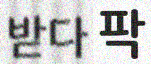

In [8]:
Image.open('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug/images/image_307999.png')

# Contrast

In [9]:
for i in tqdm(range(len(df_co))):
    
    # 파일 불러오기
    img = Image.open('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug/' + df_co['img_path'].iloc[i])
    
    # augmentation
    img = Contrast()(img, mag=0)  # mag=0일때 가장 덜 적용됨
    
    # 파일 저장
    file_name = 'image_' + str(i + 300000 + 16000*1) + '.png'
    img.save('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug/images/' + file_name, 'png')
    
    # df에 추가
    file_path = 'images/' + file_name
    df.loc[len(df) + 1] = [file_path, df_co.iloc[i][1]]

100%|█████████████████████████████████████████████████████████████████████████████| 16000/16000 [02:56<00:00, 90.89it/s]


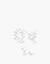

In [10]:
Image.open('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug/images/image_316999.png')

# Brightness

In [11]:
for i in tqdm(range(len(df_br))):
    
    # 파일 불러오기
    img = Image.open('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug/' + df_br['img_path'].iloc[i])
    
    # augmentation
    img = Brightness()(img, mag=1) 
    
    # 파일 저장. 
    file_name = 'image_' + str(i + 300000 + 16000*2) + '.png'
    img.save('//home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug/images/' + file_name, 'png')
    
    # df에 추가
    file_path = 'images/' + file_name
    df.loc[len(df) + 1] = [file_path, df_br.iloc[i][1]]

100%|█████████████████████████████████████████████████████████████████████████████| 16000/16000 [04:00<00:00, 66.50it/s]


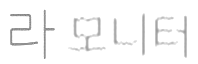

In [12]:
Image.open('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug/images/image_333999.png')

# Pixelate

In [13]:
for i in tqdm(range(len(df_pi))):
    
    # 파일 불러오기
    img = Image.open('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug/' + df_pi['img_path'].iloc[i])
    
    # augmentation
    img = Pixelate()(img) 
    
    # 파일 저장. 파일명 숫자 224000 ~ 232000-1
    file_name = 'image_' + str(i + 300000 + 16000*3) + '.png'
    img.save('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug/images/' + file_name, 'png')
    
    # df에 추가
    file_path = 'images/' + file_name
    df.loc[len(df) + 1] = [file_path, df_pi.iloc[i][1]]

100%|█████████████████████████████████████████████████████████████████████████████| 16000/16000 [03:03<00:00, 87.08it/s]


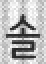

In [14]:
Image.open('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug/images/image_350000.png')

# GaussianBlur

In [15]:
import cv2
import numpy as np
import torchvision.transforms as transforms
from PIL import Image, ImageOps
from skimage.filters import gaussian

class GaussianBlur:
    def __init__(self, rng=None):
        self.rng = np.random.default_rng() if rng is None else rng

    def __call__(self, img, mag=-1, prob=1.):
        if self.rng.uniform(0, 1) > prob:
            return img

        w, h = img.size
        # kernel = [(31,31)] prev 1 level only
        ksize = int(min(w, h) / 2) // 4
        ksize = (ksize * 2) + 1
        kernel = (ksize, ksize)
        sigmas = [.5, 1, 2]
        if mag < 0 or mag >= len(sigmas):
            index = self.rng.integers(0, len(sigmas))
        else:
            index = mag

        sigma = sigmas[index]
        return transforms.GaussianBlur(kernel_size=kernel, sigma=sigma)(img)

In [16]:
for i in tqdm(range(len(df_bl))):
    
    # 파일 불러오기
    img = Image.open('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug/' + df_bl['img_path'].iloc[i])
    
    # augmentation
    img = GaussianBlur()(img) 
    
    # 파일 저장. 파일명 숫자 232000 ~ 240000-1
    file_name = 'image_' + str(i + 300000 + 16000*4) + '.png'
    img.save('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug/images/' + file_name, 'png')
    
    # df에 추가
    file_path = 'images/' + file_name
    df.loc[len(df) + 1] = [file_path, df_bl.iloc[i][1]]

100%|█████████████████████████████████████████████████████████████████████████████| 16000/16000 [10:48<00:00, 24.69it/s]


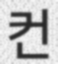

In [17]:
Image.open('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug/images/image_369999.png')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162944 entries, 0 to 162944
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   img_path  162944 non-null  object
 1   label     162944 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB


In [19]:
# df 모두 합치기
df = pd.concat([df, df_no, df_br, df_bl, df_co, df_pi])
df

,img_path,label
0,images/image_031251.png,넣
1,images/image_215487.png,위쪽
2,images/image_222170.png,장국수
3,images/image_274214.png,추천하다
4,images/image_211616.png,자
...,...,...
42936,images/image_075016.png,코스모스
114334,images/image_101942.png,다초보자
43225,images/image_075753.png,흘러나오다
95162,images/image_106185.png,연합마음대로


In [20]:
# 순서 섞기
df = df.sample(frac=1).reset_index(drop=True)
df

,img_path,label
0,images/image_267649.png,언덕
1,images/image_030293.png,식당
2,images/image_368806.png,여우
3,images/image_337691.png,퇴직금
4,images/image_011105.png,바
...,...,...
242939,images/image_209320.png,펏
242940,images/image_216046.png,제공죠
242941,images/image_205466.png,얼음
242942,images/image_240077.png,아래층


In [21]:
# df를 text 파일로 저장
df.to_csv('gt.txt',header=None,index=False,sep='\t') ## 구분자를 탭으로 하여 저장. 인덱스칼럼은 저장 안함.

In [22]:
%cd /home/cuai5th/CUAI_2022/KWAKsumin/OCR

/home/cuai5th/CUAI_2022/KWAKsumin/OCR


In [23]:
!python3 deep-text-recognition/create_lmdb_dataset.py \
        --inputPath data_transformed/train_aug \
        --gtFile data_transformed/train_aug/gt.txt \
        --outputPath deep/data_ocr/training/kordata

Written 1000 / 242944
Written 2000 / 242944
Written 3000 / 242944
Written 4000 / 242944
Written 5000 / 242944
Written 6000 / 242944
Written 7000 / 242944
Written 8000 / 242944
Written 9000 / 242944
Written 10000 / 242944
Written 11000 / 242944
Written 12000 / 242944
Written 13000 / 242944
Written 14000 / 242944
Written 15000 / 242944
Written 16000 / 242944
Written 17000 / 242944
Written 18000 / 242944
Written 19000 / 242944
Written 20000 / 242944
Written 21000 / 242944
Written 22000 / 242944
Written 23000 / 242944
Written 24000 / 242944
Written 25000 / 242944
Written 26000 / 242944
Written 27000 / 242944
Written 28000 / 242944
Written 29000 / 242944
Written 30000 / 242944
Written 31000 / 242944
Written 32000 / 242944
Written 33000 / 242944
Written 34000 / 242944
Written 35000 / 242944
Written 36000 / 242944
Written 37000 / 242944
Written 38000 / 242944
Written 39000 / 242944
Written 40000 / 242944
Written 41000 / 242944
Written 42000 / 242944
Written 43000 / 242944
Written 44000 / 2429